In [1]:

# import os, codecs, sys
# from nltk.stem.porter import PorterStemmer
# import numpy as np

# data_dir = f"data/aclImdb/"
# sent_dir = f"{data_dir}test/pos/"
# all_reviews = [rev for rev in os.listdir(sent_dir) if rev[-4:] == ".txt"]
# all_reviews
# fpth = f"{sent_dir}{all_reviews[0]}"
# with open(fpth) as f:
#     # NOTE: assumes we want to split by space -- discuss!!
#     # e.g., "kick the bucket" diff meaning than individ words, but sep by spaces
#     full_review_data = f.readlines()[0].split(" ") 

In [2]:
# full_review_data[0].split(" ")

In [9]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

import os, codecs, sys
from nltk.stem.porter import PorterStemmer
import numpy as np

data_dir = f"data/aclImdb/"
sent_dir = f"{data_dir}test/pos/"
all_reviews = [rev for rev in os.listdir(sent_dir) if rev[-4:] == ".txt"]
all_reviews
fpth = f"{sent_dir}{all_reviews[0]}"
with open(fpth) as f:
    # NOTE: assumes we want to split by space -- discuss!!
    # e.g., "kick the bucket" diff meaning than individ words, but sep by spaces
    full_review_data = f.readlines()[0].split(" ") 
    
# data = ["I love machine learning. Its awesome.",
#         "I love coding in python",
#         "I love building chatbots",
#         "they chat amagingly well"]

tagged_data2 = [TaggedDocument(doc, [i]) for i, doc in enumerate([full_review_data])]

data = [" ".join(full_review_data)]
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data)]

[nltk_data] Downloading package punkt to /Users/kcollins/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
from gensim.models import Doc2Vec
model = Doc2Vec(vector_size=50, window=2)
model.build_vocab(tagged_data2)
model.train(tagged_data2, total_examples=model.corpus_count, epochs=2)
model.infer_vector(full_review_data)

array([-0.00858445, -0.0025208 ,  0.00340851,  0.00559627, -0.00018348,
       -0.00509644, -0.00727983,  0.00172328, -0.00224842,  0.00911236,
        0.00550228,  0.00917563, -0.00229089, -0.00023794, -0.00128236,
       -0.00012777, -0.00349216,  0.0084849 , -0.00831176, -0.00116774,
        0.00279094, -0.00747453, -0.00042225, -0.00442204, -0.00958006,
       -0.00708115,  0.00272685,  0.0046035 , -0.00072147,  0.00564601,
       -0.00484888,  0.00538824, -0.0041378 , -0.00590575, -0.00047232,
        0.00757254,  0.00792406,  0.00834035,  0.00814834,  0.00751941,
       -0.00126159, -0.00535745,  0.00380593,  0.00660281,  0.00458905,
       -0.00441384, -0.00312149, -0.00883249,  0.00029314,  0.00530691],
      dtype=float32)

In [2]:
corpus.test[:5]

[['POS',
  ['based',
   'on',
   'an',
   'actual',
   'story,',
   'john',
   'boorman',
   'shows',
   'the',
   'struggle',
   'of',
   'an',
   'american',
   'doctor,',
   'whose',
   'husband',
   'and',
   'son',
   'were',
   'murdered',
   'and',
   'she',
   'was',
   'continually',
   'plagued',
   'with',
   'her',
   'loss.',
   'a',
   'holiday',
   'to',
   'burma',
   'with',
   'her',
   'sister',
   'seemed',
   'like',
   'a',
   'good',
   'idea',
   'to',
   'get',
   'away',
   'from',
   'it',
   'all,',
   'but',
   'when',
   'her',
   'passport',
   'was',
   'stolen',
   'in',
   'rangoon,',
   'she',
   'could',
   'not',
   'leave',
   'the',
   'country',
   'with',
   'her',
   'sister,',
   'and',
   'was',
   'forced',
   'to',
   'stay',
   'back',
   'until',
   'she',
   'could',
   'get',
   'i.d.',
   'papers',
   'from',
   'the',
   'american',
   'embassy.',
   'to',
   'fill',
   'in',
   'a',
   'day',
   'before',
   'she',
   'could',
   'fl

In [1]:
from Corpora import MovieReviewCorpus
from Lexicon import SentimentLexicon
from Statistics import SignTest
from Classifiers import NaiveBayesText, SVMText
from Extensions import SVMDoc2Vec, DocFeaturizer


# retrieve corpus
corpus=MovieReviewCorpus(stemming=False,pos=False)

# use sign test for all significance testing
signTest=SignTest()

print("--- classifying reviews using sentiment lexicon  ---")

# read in lexicon
lexicon=SentimentLexicon()

# on average there are more positive than negative words per review (~7.13 more positive than negative per review)
# to take this bias into account will use threshold (roughly the bias itself) to make it harder to classify as positive
# todo: vary this!!! 
threshold=8

# question 8.0
print("--- using document embeddings ---")
# load in IMDB dataset [TODO!!]
corpus=MovieReviewCorpus(stemming=False,pos=False,use_imdb=True)

# train doc2vec
feature_dim = 200
window = 5
epochs = 100
DF = DocFeaturizer(feature_dim, window, dm=0, dbow_words=1, dm_concat=0)
DF.train_model(corpus.train, epochs)

SVMDV=SVMDoc2Vec(model=DF,bigrams=False,trigrams=False,discard_closed_class=False)
SVMDV.train(corpus.train)

num train: 1800, num test: 200
tot num reviews: 2000
--- classifying reviews using sentiment lexicon  ---
--- using document embeddings ---
num train: 25000, num test: 25000
tot num reviews: 50000


In [2]:
# SVMDV=SVMDoc2Vec(model=DF,bigrams=True,trigrams=False,discard_closed_class=False)
# SVMDV.train(corpus.train)

SVMDV.test(corpus.test)
svm_doc2vec_preds=SVMDV.predictions
print(f"Accuracy: {SVMDV.getAccuracy():.2f}") 
print(f"Std. Dev: {SVMDV.getStdDeviation():.2f}")

Accuracy: 0.86
Std. Dev: 0.02


In [8]:
SVMDV.vocabulary

{'/>did',
 'extra-marital',
 '"oddities",',
 'ralphie',
 'katharine',
 'work...count',
 'recap.',
 'forthright,',
 'fontanelles',
 '"va-poo-rize"',
 'boosh;',
 'three!',
 'mwah,',
 'frontiers.',
 '/>taji',
 'ruta',
 '999"',
 'period.',
 'morn',
 "'intervention'",
 'prizefighter.',
 'symbol.<br',
 'uncertainties',
 'fu...',
 'capped-off',
 '"ugly',
 'usage',
 'access',
 'montford:',
 'loves...but',
 'meridian").<br',
 'reeds',
 'unrelatable.',
 'haggard.',
 'ruthlessly,',
 'emma?!',
 'grovelling',
 'is--very',
 "northam(who's",
 'wtc).',
 'release!"',
 'two-scener',
 'anti-islam',
 '*good*',
 'voogdt.<br',
 '/>jillian',
 'almonds',
 'unintentional',
 'laboratory,',
 'shrieks,',
 '"reappearance"',
 'starling',
 '("versus",',
 'herd.<br',
 'go--as',
 "scares'",
 'live...but',
 'wongo"',
 'for...a',
 'homelands,',
 'foresay',
 'here..',
 '(pip',
 "woulnd't",
 'purse;',
 'that\x85',
 'meteors',
 'spelunking',
 'strobing',
 '"fop',
 'seethe',
 'hi-jinks,',
 'imagination;',
 'director/writer/

In [3]:
DF.model.get_latest_training_loss()

0.0

In [4]:
dv = DF.model.dv
len(dv)

25000

array([[ 0.11287355,  0.04551661,  0.01777648,  0.15481442,  0.0633809 ,
        -0.0081651 , -0.05729017,  0.13224791, -0.2427968 , -0.12789969,
         0.07338427, -0.09848694, -0.05230492,  0.1761894 , -0.04520662,
         0.1317127 ,  0.00597052, -0.05279107, -0.0238488 , -0.02165873,
         0.1508331 ,  0.00508622,  0.08894528, -0.02995271, -0.11637241,
        -0.12648575, -0.01688392,  0.00130746, -0.1039289 , -0.07415009,
         0.01211558,  0.01580903,  0.12196068, -0.09563091,  0.08665032,
         0.02275749, -0.03387667,  0.05483453, -0.02035405, -0.03838968,
        -0.03004345, -0.00656709, -0.05603842, -0.1134588 , -0.03573323,
        -0.00720759,  0.0373876 , -0.16220416,  0.13571358,  0.03660788,
        -0.03371324, -0.0215136 , -0.02695829, -0.15510856,  0.00647414,
         0.01688686, -0.12739344, -0.15126674, -0.08018967,  0.02784741,
        -0.12772286, -0.0734293 ,  0.02660369,  0.14375837,  0.00676253,
        -0.00937383,  0.02622669,  0.05569769, -0.0

In [36]:
words = list(DF.model.wv.index_to_key)
words

good = ["good", "great","amazing","best"]
bad = ["avoid","boring","terrible","bad"]
extreme = ["incredibly", "particularly", "very"] # e.g., extreme words, or neutral
neutral = ["the", "a", "but"]

In [17]:
# help from: https://stackoverflow.com/questions/40581010/how-to-run-tsne-on-word2vec-created-from-gensim
# and: https://stackoverflow.com/questions/66868221/gensim-3-8-0-to-gensim-4-0-0
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
wv = DF.model.wv
vocab = list(DF.model.wv.index_to_key)
X = wv[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

NameError: name 'plt' is not defined

<AxesSubplot:>

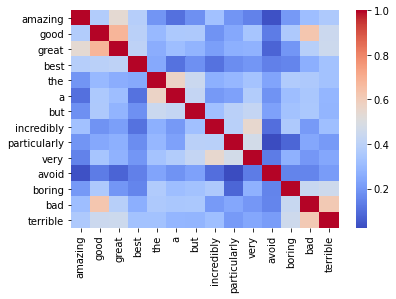

In [48]:
sample_words = good + neutral + extreme + bad
V = len(sample_words)
sims = np.zeros([V, V])
for i, w_i in enumerate(sample_words):
    for j, w_j in enumerate(sample_words):
        sims[i][j] = wv.similarity(w_i, w_j)
sns.heatmap(sims,xticklabels=sample_words, yticklabels=sample_words,cmap="coolwarm")
# add titles!!!! 

<AxesSubplot:>

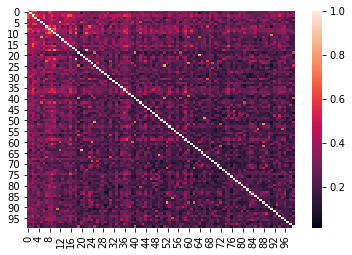

In [28]:
sns.heatmap(sims[:100,:100])

In [35]:
wv.similarity("good", "bad")

0.6294764

In [26]:
import seaborn as sns
import numpy as np
V = len(vocab)
sims = np.zeros([V, V])
for i, w_i in enumerate(vocab):
    for j, w_j in enumerate(vocab):
        sims[i][j] = wv.similarity(w_i, w_j)
sns.heatmap(sims)

KeyboardInterrupt: 

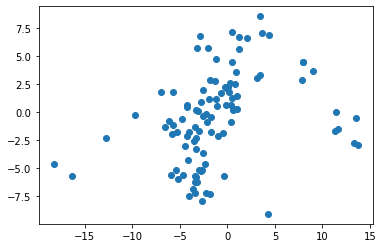

In [19]:
plt.scatter(X_tsne[:100, 0], X_tsne[:100, 1])
plt.show()

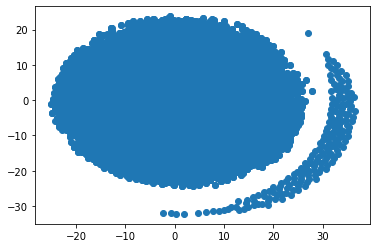

In [18]:
import matplotlib.pyplot as plt
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

In [8]:
SVMDV.crossValidate(corpus)

/Users/kcollins/MLMI13/Analysis.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])


KeyboardInterrupt: 

In [11]:
features = SVMDV.getFeatures(corpus.test)


In [14]:
import numpy as np
np.shape(features)

(25000, 10)

In [9]:
feature_dims = [10, 50, 100, 200, 500]
window = 5
epochs = 100
for feature_dim in feature_dims:
    print("feature dim: ", feature_dim)
    DF = DocFeaturizer(feature_dim, window)
    DF.train_model(corpus.train, epochs)
    SVMDV=SVMDoc2Vec(model=DF,bigrams=False,trigrams=False,discard_closed_class=False)
    SVMDV.crossValidate(corpus)
    svm_doc2vec_preds=SVMDV.predictions
    print(f"Accuracy: {SVMDV.getAccuracy():.2f}") 
    print(f"Std. Dev: {SVMDV.getStdDeviation():.2f}")

feature dim:  10


/Users/kcollins/MLMI13/Analysis.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

KeyboardInterrupt: 

In [2]:
train_embs = DF.get_embeddings(corpus.train)

In [3]:
test_embs = DF.get_embeddings(corpus.test)

TypeError: object.__init__() takes exactly one argument (the instance to initialize)

In [3]:
# apply to new prediction problem
normalize_vecs = False
svm_doc2vec_preds 

# compare to past models
# need to re-train Naive Bayes on this dataset! 
print(f"Accuracy: {SVMDV.getAccuracy():.2f}") 
print(f"Std. Dev: {SVMDV.getStdDeviation():.2f}")
p_value=signTest.getSignificance(svm_doc2vec_preds,smoothed_preds)
signifance = "significant" if p_value < 0.05 else "not significant"
print(f"results for SVM with  {signifance} with respect to Naive Bayes")

'POS'

In [ ]:
# !pip3 install gensim

In [ ]:
from Corpora import MovieReviewCorpus
from Lexicon import SentimentLexicon
from Statistics import SignTest
from Classifiers import NaiveBayesText, SVMText
from Extensions import SVMDoc2Vec, DocFeaturizer

In [ ]:
# retrieve corpus
corpus=MovieReviewCorpus(stemming=False,pos=False)

# use sign test for all significance testing
signTest=SignTest()

print("--- classifying reviews using sentiment lexicon  ---")

# read in lexicon
lexicon=SentimentLexicon()

# on average there are more positive than negative words per review (~7.13 more positive than negative per review)
# to take this bias into account will use threshold (roughly the bias itself) to make it harder to classify as positive
# todo: vary this!!! 
threshold=8

# NOTE: from katie to self -- play w/ changing the threshold value! 

# question 0.1
lexicon.classify(corpus.reviews,threshold,magnitude=False)
token_preds=lexicon.predictions
print(f"token-only results: {lexicon.getAccuracy():.2f}")

lexicon.classify(corpus.reviews,threshold,magnitude=True)
magnitude_preds=lexicon.predictions
print(f"magnitude results: {lexicon.getAccuracy():.2f}")

# question 0.2
p_value=signTest.getSignificance(token_preds,magnitude_preds)
significance = "significant" if p_value < 0.05 else "not significant"
print(f"magnitude lexicon results are {significance} with respect to token-only")

In [ ]:
# question 1.0
print("--- classifying reviews using Naive Bayes on held-out test set ---")
NB=NaiveBayesText(smoothing=False,bigrams=False,trigrams=False,discard_closed_class=False)
NB.train(corpus.train)
NB.test(corpus.test)
# store predictions from classifier
non_smoothed_preds=NB.predictions
print(f"Accuracy without smoothing: {NB.getAccuracy():.2f}")

In [ ]:
# question 2.0
# use smoothing
NB=NaiveBayesText(smoothing=True,bigrams=False,trigrams=False,discard_closed_class=False)
NB.train(corpus.train)
NB.test(corpus.test)
smoothed_preds=NB.predictions
# saving this for use later
num_non_stemmed_features=len(NB.vocabulary)
print(f"Accuracy using smoothing: {NB.getAccuracy():.2f}")

# question 2.1
# see if smoothing significantly improves results
p_value=signTest.getSignificance(non_smoothed_preds,smoothed_preds)
significance = "significant" if p_value < 0.05 else "not significant"
print(f"results using smoothing are {significance} with respect to no smoothing")

In [ ]:
# question 3.0
print("--- classifying reviews using 10-fold cross-evaluation ---")
# using previous instantiated object
NB.crossValidate(corpus)
# using cross-eval for smoothed predictions from now on
smoothed_preds=NB.predictions
print(f"Accuracy: {NB.getAccuracy():.3f}")
print(f"Std. Dev: {NB.getStdDeviation()}")

In [ ]:
# question 4.0
print("--- stemming corpus ---")
# retrieve corpus with tokenized text and stemming (using porter)
stemmed_corpus=MovieReviewCorpus(stemming=True,pos=False)
print("--- cross-validating NB using stemming ---")
NB.crossValidate(stemmed_corpus)
stemmed_preds=NB.predictions
print(f"Accuracy: {NB.getAccuracy():.3f}")
print(f"Std. Dev: {NB.getStdDeviation():.3f}")

# TODO Q4.1
# see if stemming significantly improves results on smoothed NB (both did cv)
p_value=signTest.getSignificance(stemmed_preds,smoothed_preds) # note compared against version w/ smoothing! 
significance = "significant" if p_value < 0.05 else "not significant"
print(f"results using stemming are {significance} with respect to no stemming")

# TODO Q4.2
print("--- determining the number of features before/after stemming ---")
# (**) changing the number of features == changing the number of words in the vocab 
NB.train(corpus.train)
NB.test(corpus.test)
num_stemmed_features = len(NB.vocabulary)
print(f"num features, non-stemmed: {num_non_stemmed_features} vs. num features, stemmed: {num_stemmed_features}")

In [ ]:
# question Q5.0
# cross-validate model using smoothing and bigrams
print("--- cross-validating naive bayes using smoothing and bigrams ---")
NB=NaiveBayesText(smoothing=True,bigrams=True,trigrams=False,discard_closed_class=False)
NB.crossValidate(corpus)
smoothed_and_bigram_preds=NB.predictions
print(f"Accuracy: {NB.getAccuracy():.2f}") 
print(f"Std. Dev: {NB.getStdDeviation():.2f}")


# see if bigrams significantly improves results on smoothed NB only
p_value=signTest.getSignificance(smoothed_preds,smoothed_and_bigram_preds)
signifance = "significant" if p_value < 0.05 else "not significant"
print(f"results using smoothing and bigrams are {signifance} with respect to smoothing only")


# TODO Q5.1
# katie: from q3 (num_non_stemmed_features)
num_bow_features = len(NB.vocabulary)
print(f"num features for [model] (Q3): {num_non_stemmed_features} vs. num features BoW: {num_bow_features}")

In [ ]:
# TODO Q6 and 6.1
print("--- classifying reviews using SVM 10-fold cross-eval ---")
SVM=SVMText(bigrams=True,trigrams=False,discard_closed_class=False)
SVM.crossValidate(corpus)
svm_preds=SVM.predictions
print(f"Accuracy: {SVM.getAccuracy():.2f}") 
print(f"Std. Dev: {SVM.getStdDeviation():.2f}")

In [ ]:
# TODO Q7.0
print("--- adding in POS information to corpus ---")
pos_corpus=MovieReviewCorpus(stemming=False,pos=True)
print("--- training svm on word+pos features ----")
SVM=SVMText(bigrams=True,trigrams=False,discard_closed_class=False)
SVM.crossValidate(pos_corpus)
svm_pos_preds=SVM.predictions
print(f"Accuracy: {SVM.getAccuracy():.2f}") 
print(f"Std. Dev: {SVM.getStdDeviation():.2f}")
p_value=signTest.getSignificance(svm_pos_preds,svm_preds)
signifance = "significant" if p_value < 0.05 else "not significant"
print(f"results using pos tags {signifance} with respect to not using pos tags")

In [ ]:
# TODO: QUESTION 7.1
print("--- training svm discarding closed-class words ---") # QUESTION: do we not use POS here??
SVM=SVMText(bigrams=True,trigrams=False,discard_closed_class=True)
SVM.crossValidate(corpus)
svm_preds_closed=SVM.predictions
print(f"Accuracy: {SVM.getAccuracy():.2f}") 
print(f"Std. Dev: {SVM.getStdDeviation():.2f}")
p_value=signTest.getSignificance(svm_preds_closed,svm_preds)
signifance = "significant" if p_value < 0.05 else "not significant"
print(f"results discarding closed class {signifance} with respect to keeping the closed class")

In [ ]:
# question 8.0
print("--- using document embeddings ---")
# load in IMDB dataset [TODO!!]
corpus = None

# train doc2vec
feature_dim = 50
window = 2
epochs = 2
DF = DocFeaturizer(feature_dim, window)
DF.train(corpus, epochs)

# apply to new prediction problem
normalize_vecs = False
svm_doc2vec_preds 

# compare to past models
# need to re-train Naive Bayes on this dataset! 
print(f"Accuracy: {SVMDV.getAccuracy():.2f}") 
print(f"Std. Dev: {SVMDV.getStdDeviation():.2f}")
p_value=signTest.getSignificance(svm_doc2vec_preds,smoothed_preds)
signifance = "significant" if p_value < 0.05 else "not significant"
print(f"results for SVM with  {signifance} with respect to Naive Bayes")

In [ ]:
# analyze returned features and make a tSNE 